<a href="https://colab.research.google.com/github/anvithakp/ML-Google-Colab/blob/master/k_means_clustering_scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-1
## Method -1 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd

# Importing the data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/Data/housepricing.csv"
data = pd.read_csv(path)

# Visualizing the data

In [ ]:
data.head()

,Price,Lot Size,Waterfront,Age,Land Value,New Construct,Central Air,Fuel Type,Heat Type,Sewer Type,Living Area,Pct College,Bedrooms,Fireplaces,Bathrooms,Rooms
0,132500,0.09,0,42,50000,0,0,3,4,2,906,35,2,1,1.0,5
1,181115,0.92,0,0,22300,0,0,2,3,2,1953,51,3,0,2.5,6
2,109000,0.19,0,133,7300,0,0,2,3,3,1944,51,4,1,1.0,8
3,155000,0.41,0,13,18700,0,0,2,2,2,1944,51,3,1,1.5,5
4,86060,0.11,0,0,15000,1,1,2,2,3,840,51,2,0,1.0,3


# Data Cleaning

Removing rows with Non numeric values, if any

In [ ]:
data = data.dropna()
data = data.reset_index(drop=True)

In [ ]:
new_data = data[["Age","Price"]]

In [ ]:
new_data.describe()

,Age,Price
count,1728.000000,1728.000000
mean,27.916088,211966.705440
std,29.209988,98441.391015
min,0.000000,5000.000000
25%,13.000000,145000.000000
50%,19.000000,189900.000000
75%,34.000000,259000.000000
max,225.000000,775000.000000



Now, we are standardizing the data due to a huge difference in the magnitudes of house age and price

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)

pd.DataFrame(scaled_data).describe()

,0,1
count,1.728000e+03,1.728000e+03
mean,6.347803e-17,-9.136210e-17
std,1.000289e+00,1.000289e+00
min,-9.559802e-01,-2.103044e+00
25%,-5.107981e-01,-6.804667e-01
50%,-3.053294e-01,-2.242257e-01
75%,2.083422e-01,4.779180e-01
max,6.749094e+00,5.721133e+00


# Clustering

Here we are implementing K-means clustering algorithm using Scikit library. K-means is a type of unsupervised learning and one of the popular methods of clustering unlabelled data into k number of clusters

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
y_kmeans = kmeans.predict(scaled_data)

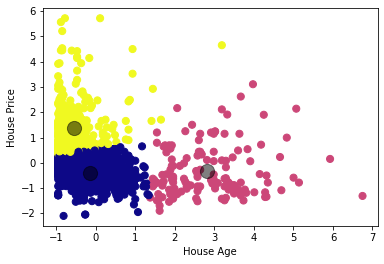

In [ ]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=y_kmeans, s=50, cmap='plasma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.show()

# Summary

From the above graph we can clearly visualize the clusters. We can see that almost all the older houses clearly sell at lower price points.

Majority of the newer homes sell at low to medium price points.whereas some of the newer homes are sold at higher price points. The reason for this might be the difference in the amenities,neighbourhood or other factors when gone through the dataset.

Therefore the clusters can be categorized as : Old houses cluster, new homes with better facilities /amenities /neighbourhood cluster and new homes with poor facilities /amenities /neighbourhood cluster.



# Elbow Method

Elbow-method for depicting the optimal value of K ( i.e., number of clusters)

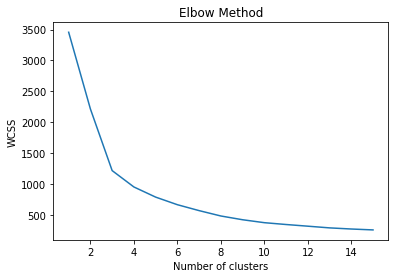

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,  n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Thus the optimal value of the K is 3